# Gath - Geva Clustering

In [1]:

import numpy as np

First thing first, let's use the generator tools from previous works

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def get_random_covariance(d):
    """
    Function to generate a random, valid covariance matrix of size d x d
    """
    sigma = np.random.rand(d, d) - 0.5
    sigma = np.dot(sigma, sigma.T)  # make the matrix symmetric
    return sigma


def get_random_gaussian_dist(d, distance=5):
    """
     generate a random Gaussian distribution with mean mu and covariance matrix sigma
    The distance parameter specifies the distance of the mean from the origin
    """
    sigma = get_random_covariance(d)  # generate a random covariance matrix
    mu = np.array(np.random.rand(d)) * distance  # generate a random mean
    return mu, sigma


def generate_normal_datapoint(guaussian_dist):
    """
     generate a single datapoint from a Gaussian distribution with mean and covariance matrix guaussian_dist
    """
    mean = guaussian_dist[0]
    cov = guaussian_dist[1]
    dp = np.random.multivariate_normal(mean, cov, check_valid='warn', tol=1e-8)
    return dp


def generate_gaussian_cluster(guaussian_dist, k,d = 2, dataset=None):
    """
    Function to generate a cluster of k datapoints from the Gaussian distribution guaussian_dist
    The dataset parameter can be used to append the generated cluster to an existing dataset
    gauss_dist is a tuple of the form (mean, covariance matrix)
    """
    cluster = np.empty((0, d))  # initialize an empty array to store the datapoints
    for i in range(k):
        p = generate_normal_datapoint(guaussian_dist)  # generate a single datapoint
        cluster = np.append(cluster, [p], axis=0)  # add the datapoint to the cluster
    if dataset:
        dataset = np.append(dataset, cluster)  # append the cluster to an existing dataset, if provided
    return cluster
def generate_clusters(n,k,d):
    colors =[]
    clusters = []
    # for k clusters:
    for i in range (k):
        cluster = generate_gaussian_cluster(get_random_gaussian_dist(d),n[i],d = d)
        clusters.append([cluster])
        #colors.append(np.random.uniform(0,1)/4+3*k/4)
    return clusters

def plot_clusters(*args):
    for arg in args:
        plt.scatter(arg[:,0], arg[:, 1],  alpha=0.5)

def plot_loss(loss):
    plt.figure()
    plt.plot(range(len(loss)),loss)
    plt.title("loss vs. iteration no.")
    plt.xlabel("iteration")
    plt.ylabel("|loss|")
    plt.show()


# Classical fuzzy clustering: FCM
Fuzzy C-means (FCM) is a clustering algorithm that is used to partition data points $\{x_i\}_1^n$ into a predefined number of clusters $c$. The algorithm is a 'soft' clustering method, which allows each data point to belong to multiple clusters to a certain degree.

The FCM algorithm can be summarized as follows:

1. Initialize the cluster centers.
2. Calculate the membership degrees of each data point to each cluster.
$$ p(w_j|x_i) \leftarrow
    \frac
        {({\frac{1}{d_{ij} ^2 })^{1/b-1}}}
        {\sum_{i=1}^N({\frac{1}{d_{ij} ^2 })^{1/b-1}}}
        $$


3. Update the cluster centers based on the membership degrees.
$$\mu_{cx} \leftarrow \frac{
        \sum_{i=1}^N \hat p(w_i|x_j)^b \cdot x_j}
    {
        \sum_{i=1}^N \hat p(w_i|x_j)^b }$$

Repeat steps 2-3 until the cluster centers converge.


where $d_{ij} = d(x_i,c_j)$ is the distance between the data point $x$ and the cluster center $c_i$, $b$ is a fuzzifier parameter, and $C$ is the number of clusters.

The FCM algorithm is a versatile clustering algorithm that can be used to cluster data of different types. It is also relatively robust to noise and outliers.



In [16]:
import numpy as np

def fcm(data, K, initial_centroids, max_iters = 50, fuzziness = 2, tol = 0.001):
    # Randomly initialize cluster centers
    centroids = initial_centroids
    i=0
    converged = False
    iteration_loss = []
    while (not converged) and i < max_iters:
        # Calculate the membership matrix
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        membership = 1 / (distances ** (2 / (fuzziness - 1)))
        membership = membership / np.sum(membership, axis=1)[:, None]

        # Update cluster centers
        centroids = np.dot(membership.T, data) / np.sum(membership, axis=0)[:, None]

        if i<4 or not i%10 :
            plt.figure()
            c = np.argmax(membership,axis=1)
            plt.scatter(data[:,0], data[:, 1],  c=c,alpha=0.5)
            plt.title(f'iteration {i}')

        loss = np.sum((distances**2) * membership)
        iteration_loss.append(loss)

        if i:
            converged = (abs(loss-iteration_loss[i-1]) < tol)
        i+=1

    return centroids, membership, iteration_loss

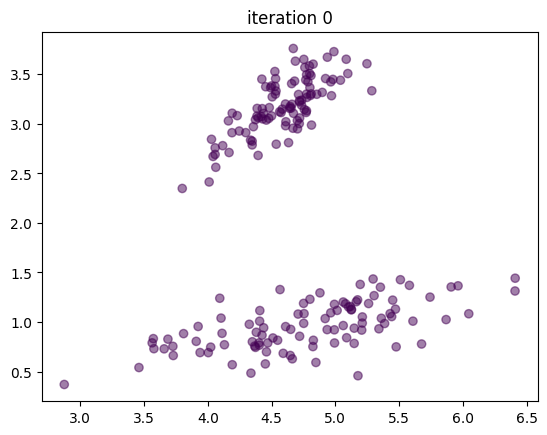

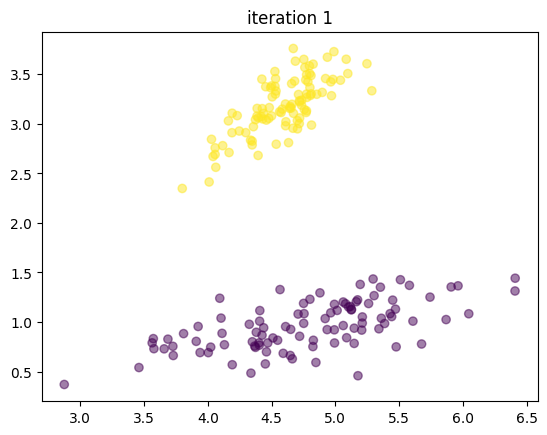

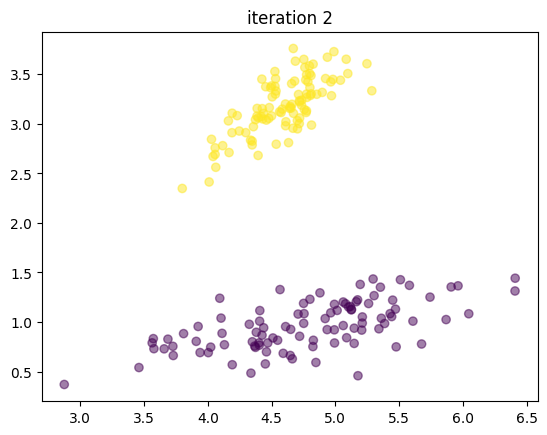

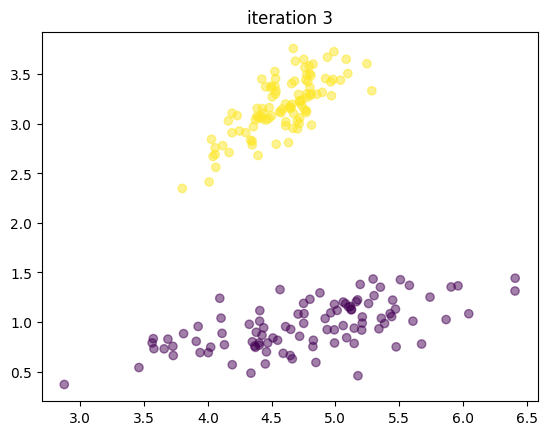

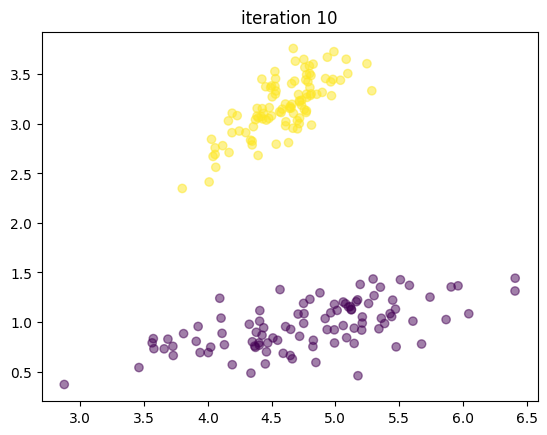

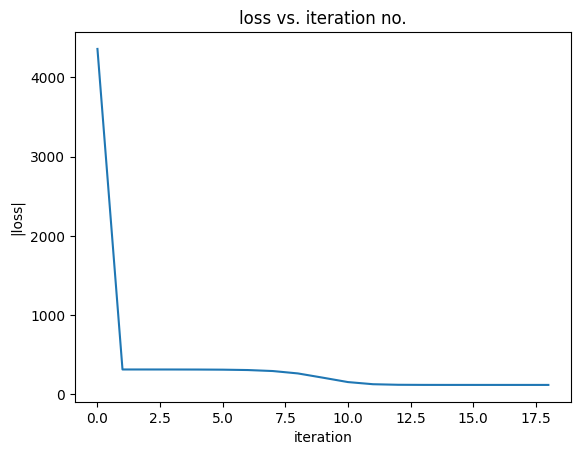

In [17]:

K = 2
max_iters = 50
fuzziness = 2


# Example usage
cluster_0 = generate_gaussian_cluster(get_random_gaussian_dist(2),100)
cluster_1 = generate_gaussian_cluster(get_random_gaussian_dist(2),100)

# unify data
data = np.concatenate((cluster_0,cluster_1))

# initialize random centroids
centroids = np.random.rand(K, data.shape[1])

centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)




In [18]:
l = []
l.append(l)
print(l)

[[...]]


In [19]:
[[]]

[[]]